# Autoencoder model

### Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import help_function as hf  # customized help functions
%matplotlib inline

df = pd.read_csv('data/ai4i2020.csv')

X = df.drop('Machine failure', axis=1)
y = df['Machine failure']

# train test split
# use stratify to enforce the proportion in the splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

### Preprocess data

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()

X_train_scaled, mm_scaler = hf.preprocessing(X_train, scaler)
X_test, _ = hf.preprocessing(X_test, mm_scaler)

# Split the data into normal and anomaly parts
y_train = y_train.reset_index(drop=True)
normal_train_index = y_train[y_train == 0].index
anomaly_train_index = y_train[y_train == 1].index

X_normal_train = X_train_scaled.loc[normal_train_index].to_numpy()
X_anomaly_train = X_train_scaled.loc[anomaly_train_index].to_numpy()

y_test = y_test.reset_index(drop=True)
normal_test_index = y_test[y_test == 0].index
anomaly_test_index = y_test[y_test == 1].index

X_normal_test = X_test.loc[normal_test_index].to_numpy()
X_anomaly_test = X_test.loc[anomaly_test_index].to_numpy()

### Build an autoencoder

In [3]:
import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import regularizers

# set the precision for the network
tf.keras.backend.set_floatx('float64')

input_dim = X_normal_train.shape[1]

model = Sequential([
    
    # deconstruct / encode
    Dense(input_dim, activation='relu', 
          input_shape=(input_dim, ),),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),        
    Dense(8, activation='relu'),    
    Dense(3, activation='relu'),   
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),    
    Dense(input_dim, activation='sigmoid')    
])

model.compile(loss='mae', 
              optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 27        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_6 (Dense)              (None, 16)                1

### Model training

In [4]:
from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.callbacks import ModelCheckpoint

# set early stopping criterian
es = EarlyStopping(monitor='val_loss', 
                   mode='min',
                   verbose=1, 
                   patience=1000)

history = model.fit(X_normal_train,
                    X_normal_train,
                    epochs=2000,
                    batch_size=128,
                    validation_data=(X_train_scaled, X_train_scaled),
                    workers=20,
                    verbose=1,
                    callbacks=[es],
                    shuffle=True
                    )

Epoch 1/2000
61/61 [==============================] - 0s 3ms/step - loss: 0.2724 - val_loss: 0.2191
Epoch 2/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.1898 - val_loss: 0.1703
Epoch 3/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.1509 - val_loss: 0.1298
Epoch 4/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.1203 - val_loss: 0.1148
Epoch 5/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.1084 - val_loss: 0.1017
Epoch 6/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0967 - val_loss: 0.0942
Epoch 7/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0917 - val_loss: 0.0901
Epoch 8/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0878 - val_loss: 0.0873
Epoch 9/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0849 - val_loss: 0.0843
Epoch 10/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0821 - val_loss: 0.0823

61/61 [==============================] - 0s 1ms/step - loss: 0.0538 - val_loss: 0.0549
Epoch 83/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0539 - val_loss: 0.0540
Epoch 84/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0534 - val_loss: 0.0537
Epoch 85/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0531 - val_loss: 0.0549
Epoch 86/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0530 - val_loss: 0.0543
Epoch 87/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0529 - val_loss: 0.0533
Epoch 88/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0527 - val_loss: 0.0539
Epoch 89/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0526 - val_loss: 0.0533
Epoch 90/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0525 - val_loss: 0.0532
Epoch 91/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0522 - val_loss: 0.0534
Epoc

61/61 [==============================] - 0s 1ms/step - loss: 0.0509 - val_loss: 0.0517
Epoch 163/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0509 - val_loss: 0.0515
Epoch 164/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0507 - val_loss: 0.0521
Epoch 165/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0509 - val_loss: 0.0518
Epoch 166/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0506 - val_loss: 0.0513
Epoch 167/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0508 - val_loss: 0.0513
Epoch 168/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0507 - val_loss: 0.0515
Epoch 169/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0507 - val_loss: 0.0516
Epoch 170/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0507 - val_loss: 0.0516
Epoch 171/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0507 - val_loss: 0.

61/61 [==============================] - 0s 1ms/step - loss: 0.0461 - val_loss: 0.0468
Epoch 243/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0460 - val_loss: 0.0475
Epoch 244/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0467 - val_loss: 0.0471
Epoch 245/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0459 - val_loss: 0.0468
Epoch 246/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0459 - val_loss: 0.0465
Epoch 247/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0460 - val_loss: 0.0467
Epoch 248/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0460 - val_loss: 0.0474
Epoch 249/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0461 - val_loss: 0.0464
Epoch 250/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0459 - val_loss: 0.0475
Epoch 251/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0460 - val_loss: 0.

61/61 [==============================] - 0s 1ms/step - loss: 0.0458 - val_loss: 0.0461
Epoch 323/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0453 - val_loss: 0.0467
Epoch 324/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0456 - val_loss: 0.0465
Epoch 325/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0456 - val_loss: 0.0467
Epoch 326/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0456 - val_loss: 0.0463
Epoch 327/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0453 - val_loss: 0.0463
Epoch 328/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0456 - val_loss: 0.0465
Epoch 329/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0454 - val_loss: 0.0467
Epoch 330/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0458 - val_loss: 0.0479
Epoch 331/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0457 - val_loss: 0.

61/61 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0460
Epoch 403/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0453 - val_loss: 0.0468
Epoch 404/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0453 - val_loss: 0.0463
Epoch 405/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0452 - val_loss: 0.0462
Epoch 406/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0461
Epoch 407/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0452 - val_loss: 0.0462
Epoch 408/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0453 - val_loss: 0.0459
Epoch 409/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0461
Epoch 410/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0462
Epoch 411/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0456 - val_loss: 0.

61/61 [==============================] - 0s 1ms/step - loss: 0.0456 - val_loss: 0.0461
Epoch 483/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0452 - val_loss: 0.0457
Epoch 484/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0465
Epoch 485/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0460
Epoch 486/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0458
Epoch 487/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0460
Epoch 488/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0450 - val_loss: 0.0463
Epoch 489/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0458
Epoch 490/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0459
Epoch 491/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0452 - val_loss: 0.

61/61 [==============================] - 0s 1ms/step - loss: 0.0449 - val_loss: 0.0458
Epoch 563/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0452 - val_loss: 0.0463
Epoch 564/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0457
Epoch 565/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0448 - val_loss: 0.0457
Epoch 566/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0452 - val_loss: 0.0470
Epoch 567/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0449 - val_loss: 0.0458
Epoch 568/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0458
Epoch 569/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0452 - val_loss: 0.0454
Epoch 570/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0452 - val_loss: 0.0460
Epoch 571/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.

61/61 [==============================] - 0s 1ms/step - loss: 0.0452 - val_loss: 0.0463
Epoch 643/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0463
Epoch 644/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0452 - val_loss: 0.0461
Epoch 645/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0450 - val_loss: 0.0453
Epoch 646/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0448 - val_loss: 0.0456
Epoch 647/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0448 - val_loss: 0.0456
Epoch 648/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0449 - val_loss: 0.0459
Epoch 649/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0449 - val_loss: 0.0459
Epoch 650/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0450 - val_loss: 0.0456
Epoch 651/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0449 - val_loss: 0.

61/61 [==============================] - 0s 1ms/step - loss: 0.0449 - val_loss: 0.0456
Epoch 723/2000
61/61 [==============================] - 0s 2ms/step - loss: 0.0449 - val_loss: 0.0456
Epoch 724/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0448 - val_loss: 0.0464
Epoch 725/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0451 - val_loss: 0.0453
Epoch 726/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0449 - val_loss: 0.0460
Epoch 727/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0449 - val_loss: 0.0452
Epoch 728/2000
61/61 [==============================] - 0s 2ms/step - loss: 0.0448 - val_loss: 0.0459
Epoch 729/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0450 - val_loss: 0.0457
Epoch 730/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0447 - val_loss: 0.0456
Epoch 731/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0448 - val_loss: 0.

61/61 [==============================] - 0s 1ms/step - loss: 0.0446 - val_loss: 0.0459
Epoch 803/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0449 - val_loss: 0.0454
Epoch 804/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0447 - val_loss: 0.0453
Epoch 805/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0449 - val_loss: 0.0455
Epoch 806/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0453 - val_loss: 0.0459
Epoch 807/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0449 - val_loss: 0.0456
Epoch 808/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0445 - val_loss: 0.0454
Epoch 809/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0450 - val_loss: 0.0458
Epoch 810/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0446 - val_loss: 0.0453
Epoch 811/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0447 - val_loss: 0.

61/61 [==============================] - 0s 1ms/step - loss: 0.0446 - val_loss: 0.0456
Epoch 883/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0446 - val_loss: 0.0461
Epoch 884/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0446 - val_loss: 0.0454
Epoch 885/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0449 - val_loss: 0.0457
Epoch 886/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0450 - val_loss: 0.0461
Epoch 887/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0446 - val_loss: 0.0453
Epoch 888/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0446 - val_loss: 0.0454
Epoch 889/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0447 - val_loss: 0.0458
Epoch 890/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0449 - val_loss: 0.0455
Epoch 891/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0444 - val_loss: 0.

61/61 [==============================] - 0s 1ms/step - loss: 0.0323 - val_loss: 0.0332
Epoch 963/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.0332
Epoch 964/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.0333
Epoch 965/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0323 - val_loss: 0.0330
Epoch 966/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.0330
Epoch 967/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.0333
Epoch 968/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0323 - val_loss: 0.0335
Epoch 969/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0323 - val_loss: 0.0332
Epoch 970/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.0336
Epoch 971/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0321 - val_loss: 0.

61/61 [==============================] - 0s 1ms/step - loss: 0.0322 - val_loss: 0.0327
Epoch 1043/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0323 - val_loss: 0.0331
Epoch 1044/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0321 - val_loss: 0.0337
Epoch 1045/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.0329
Epoch 1046/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0321 - val_loss: 0.0332
Epoch 1047/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.0328
Epoch 1048/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0325
Epoch 1049/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0322 - val_loss: 0.0330
Epoch 1050/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0328
Epoch 1051/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val

61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0332
Epoch 1122/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0327
Epoch 1123/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0325
Epoch 1124/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0330
Epoch 1125/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0326
Epoch 1126/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0335
Epoch 1127/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0330
Epoch 1128/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0329
Epoch 1129/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0321 - val_loss: 0.0331
Epoch 1130/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0322 - val

61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0338
Epoch 1201/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0329
Epoch 1202/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0327
Epoch 1203/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0331
Epoch 1204/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0332
Epoch 1205/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.0330
Epoch 1206/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0327
Epoch 1207/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0329
Epoch 1208/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.0328
Epoch 1209/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0320 - val

61/61 [==============================] - 0s 1ms/step - loss: 0.0321 - val_loss: 0.0331
Epoch 1280/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0328
Epoch 1281/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0326
Epoch 1282/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0329
Epoch 1283/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.0330
Epoch 1284/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0328
Epoch 1285/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0335
Epoch 1286/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0326
Epoch 1287/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0329
Epoch 1288/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val

61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0336
Epoch 1359/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0322 - val_loss: 0.0328
Epoch 1360/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0327
Epoch 1361/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0328
Epoch 1362/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0330
Epoch 1363/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0321 - val_loss: 0.0331
Epoch 1364/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0326
Epoch 1365/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0326
Epoch 1366/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.0334
Epoch 1367/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0320 - val

61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0325
Epoch 1438/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0325
Epoch 1439/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0325
Epoch 1440/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0326
Epoch 1441/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0328
Epoch 1442/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0330
Epoch 1443/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.0329
Epoch 1444/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0329
Epoch 1445/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.0330
Epoch 1446/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val

61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0330
Epoch 1517/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0328
Epoch 1518/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0328
Epoch 1519/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0326
Epoch 1520/2000
61/61 [==============================] - 0s 2ms/step - loss: 0.0318 - val_loss: 0.0326
Epoch 1521/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0324
Epoch 1522/2000
61/61 [==============================] - 0s 2ms/step - loss: 0.0316 - val_loss: 0.0324
Epoch 1523/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0331
Epoch 1524/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0331
Epoch 1525/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val

61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0328
Epoch 1596/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0330
Epoch 1597/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0335
Epoch 1598/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0327
Epoch 1599/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0328
Epoch 1600/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0325
Epoch 1601/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0328
Epoch 1602/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0326
Epoch 1603/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0326
Epoch 1604/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val

61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0331
Epoch 1675/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0329
Epoch 1676/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0328
Epoch 1677/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0326
Epoch 1678/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0332
Epoch 1679/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0329
Epoch 1680/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0324
Epoch 1681/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0327
Epoch 1682/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0326
Epoch 1683/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val

61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0329
Epoch 1754/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.0325
Epoch 1755/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0327
Epoch 1756/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0323
Epoch 1757/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0326
Epoch 1758/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0328
Epoch 1759/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0320 - val_loss: 0.0328
Epoch 1760/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0326
Epoch 1761/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0323
Epoch 1762/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val

61/61 [==============================] - 0s 1ms/step - loss: 0.0319 - val_loss: 0.0325
Epoch 1833/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0315 - val_loss: 0.0326
Epoch 1834/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0327
Epoch 1835/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0325
Epoch 1836/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0325
Epoch 1837/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0315 - val_loss: 0.0325
Epoch 1838/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0315 - val_loss: 0.0324
Epoch 1839/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0326
Epoch 1840/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0324
Epoch 1841/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0314 - val

61/61 [==============================] - 0s 1ms/step - loss: 0.0315 - val_loss: 0.0326
Epoch 1912/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0326
Epoch 1913/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0330
Epoch 1914/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0324
Epoch 1915/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0335
Epoch 1916/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0325
Epoch 1917/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0324
Epoch 1918/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0328
Epoch 1919/2000
61/61 [==============================] - 0s 2ms/step - loss: 0.0315 - val_loss: 0.0325
Epoch 1920/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val

61/61 [==============================] - 0s 1ms/step - loss: 0.0315 - val_loss: 0.0325
Epoch 1991/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0317 - val_loss: 0.0324
Epoch 1992/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0314 - val_loss: 0.0324
Epoch 1993/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0326
Epoch 1994/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0315 - val_loss: 0.0329
Epoch 1995/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0325
Epoch 1996/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0323
Epoch 1997/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0316 - val_loss: 0.0325
Epoch 1998/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0326
Epoch 1999/2000
61/61 [==============================] - 0s 1ms/step - loss: 0.0318 - val

### Visualize performance

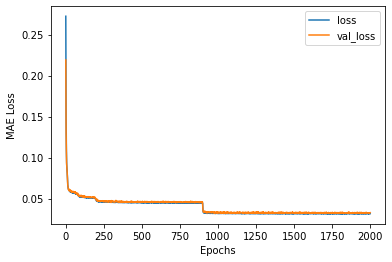

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.legend(['loss', 'val_loss']);
plt.show()

### Simple evaluation

In [6]:
threshold = hf.find_threshold(model, X_normal_test)
print(f"Threshold: {threshold}")

Threshold: 0.07071911275065956


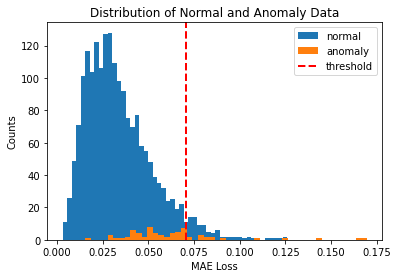

In [7]:
from tensorflow.keras.losses import msle, mae
reconstructions_normal = model.predict(X_normal_test)
train_loss = mae(reconstructions_normal, X_normal_test)
reconstructions_anomaly = model.predict(X_anomaly_test)
train_loss_a = mae(reconstructions_anomaly, X_anomaly_test)    
plt.hist(train_loss[None, :], bins=50, label='normal')
plt.hist(train_loss_a[None, :], bins=50, label='anomaly')
plt.axvline(threshold, 
            color='r', linewidth=2, linestyle='--',
            label='threshold')
plt.legend()
plt.title('Distribution of Normal and Anomaly Data')
plt.xlabel('MAE Loss')
plt.ylabel('Counts')
plt.show();

{'recall': 0.23529411764705882,
 'precision': 0.1553398058252427,
 'f1': 0.18713450292397657}

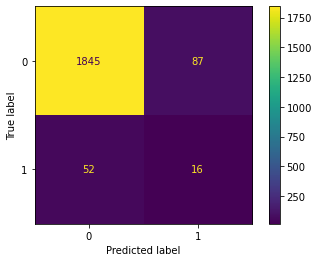

In [8]:
from sklearn.metrics import accuracy_score
y_pred = hf.get_predictions(model, X_test, threshold)
hf.evaluate(y_test, y_pred)